<a href="https://colab.research.google.com/github/OrdinaryPerception/Actividad_Monticulos/blob/main/Implementaci%C3%B3n_de_librer%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uso de librerías para representación de grafos en Python**

IGraph y NetworkX son dos librerias de Python diseñadas para facilitar la creación y tratamiento de grafos.
A partir de un grafo y una serie de instrucciones, se va a explorar como funciona cada librería y que posibilidades ofrece.

El grafo que se va a representar es el siguiente:
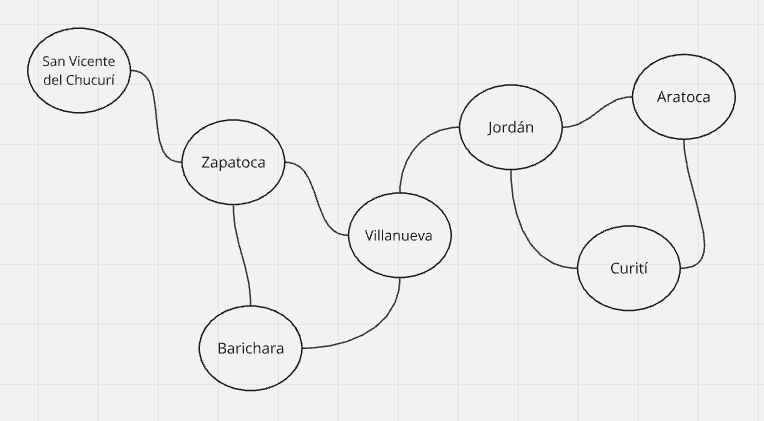

Como una matriz de adyacencia:
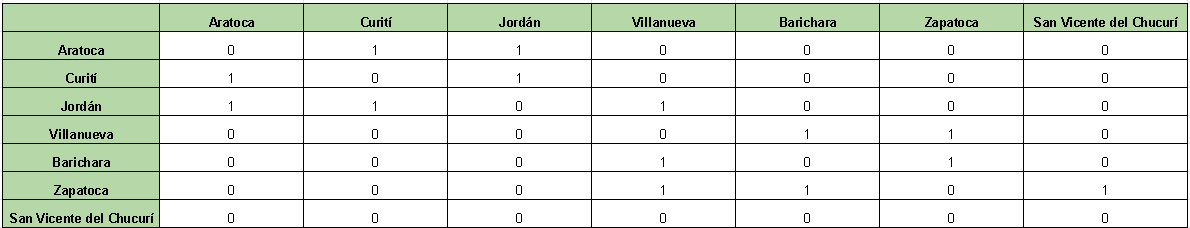




---

## **Creación del grafo**

Para crear un grafo, ambas librerias utilizan una lista de tuplas que contenga los arcos del grafo. Cada arco contendrá el par de nodos que conecta. Ya que los nodos se representan por tipos numéricos, a cada nodo del grafo original se le va a asignar un número:

*   Aratoca = 0
*   Curití = 1
*   Jordán = 2
*   Villanueva = 3
*   Barichara = 4
*   Zapatoca = 5
*   San Vicente del Chucurí = 6

En la implementación de cada librería se va a utilizar la misma lista de arcos:

In [112]:
edgelist=[(0,1),(0,2),(1,2),(2,3),(3,4),(3,5),(4,5),(5,6)]

## *IGraph*

Para comenzar a trbajar con IGraph, *esta* librería se debe instalar e importar:

In [113]:
!pip install python-igraph cairocffi

In [114]:
import igraph as ig

import scipy.io as sio
import numpy as np

Creamos una instancia de Graph, a la cual le pasaremos la lista de arcos.
Luego, a través de la propiedad "vs" de la instancia se etiquetan los nodos.

In [115]:
g=ig.Graph(edgelist)
g.vs["label"]=range(7)

Ahora podemos obtener una representación gráfica del grafo:

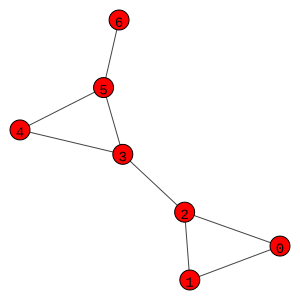

In [116]:
ig.plot(g,bbox=(0,0,300,300))

## *NetworkX*

Comenzaremos importando la librería:

In [117]:
import networkx as nx
import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np

Ahora, a partir de la función "from_edgelist" crearemos un grafo a partir de la lista de arcos:

In [118]:
G=nx.from_edgelist(edgelist)

Conseguimos una representación gráfica del grafo:

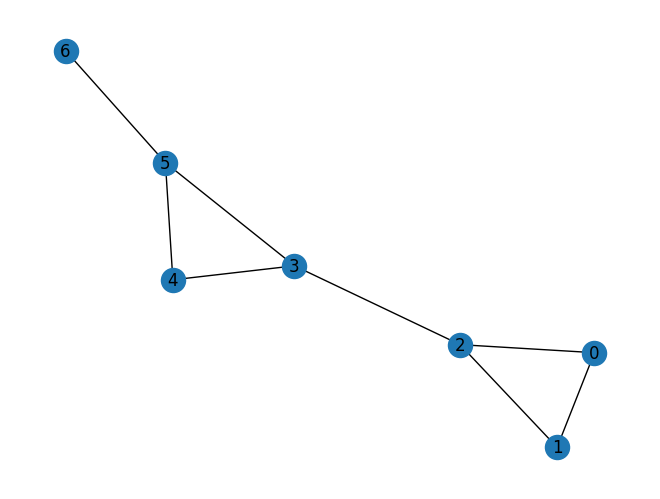

In [119]:
nx.draw(G, with_labels=True)

---

## **Modificación del grafo**

Ya tenemos el grafo, sin embargo, este no contiene los valores correspondientes al grafo original. Por lo tanto es necesario realizar unas modificaciones.

## *IGraph*

Comenzaremos modificando las etiquetas numéricas de los nodos, por su equivalente en nombres, según como se estipuló anteriormente.

In [120]:
new_labels=["Aratoca","Curití","Jordán","Villanueva","Barichara","Zapatoca","San Vicente del Chucurí"]
g.vs["label"]=new_labels

Ahora la representación gráfica:

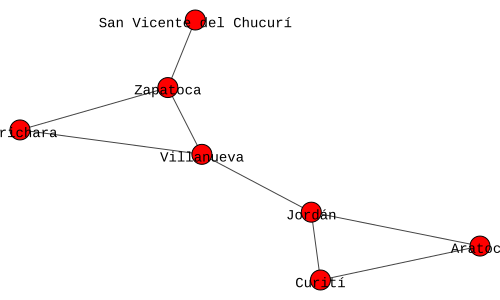

In [121]:
ig.plot(g,bbox=(0,0,500,300))

Aparte de modificar las etiquetas de los nodos, se quiere cambiar el color de los nodos con etiquetas que terminen en "i", para que estos sean de color amarillo.
Para esto, accedemos a la propiedad "vs["color"]" y lo igualamos a una lista con los nombres de los colores, siguiendo el orden asignado.

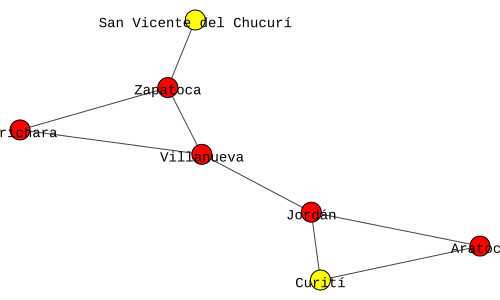

In [122]:
g.vs["color"]=["red","yellow","red","red","red","red","yellow"]
ig.plot(g,bbox=(0,0,500,300))

## *NetworkX*

Comenzaremos modificando las etiquetas numéricas de los nodos, por su equivalente en nombres, según como se estipuló anteriormente.

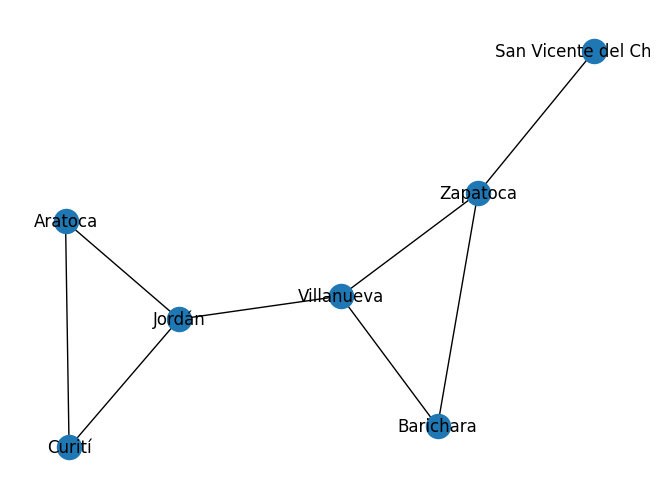

In [123]:
new_labels2={0:"Aratoca",1:"Curití",2:"Jordán",3:"Villanueva",4:"Barichara",5:"Zapatoca",6:"San Vicente del Chucurí"} #Establecemos un diccionario con el nodo y su nuevo valor
nx.relabel_nodes(G,new_labels2,copy=False)
nx.draw(G, with_labels = True)

Ahora cambiaremos los colores de los nodos que terminen en "i" como se hizo en el apartado anterior

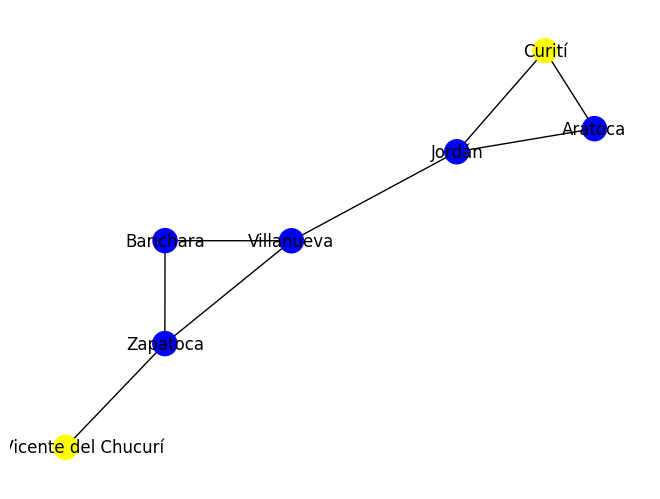

In [124]:
node_colors=["blue","yellow","blue","blue","blue","blue","yellow"]
nx.draw(G, with_labels = True, node_color=node_colors)

---

## **Agregación y eliminación de nodos y arcos**

Para la siguiente prueba se va a eliminar el nodo "Barichara", y añadiremos el nodo "San Gil", el cual solo tendrá conexión con el nodo "Villanueva". También se va a eliminar el arco (Aratoca, Curití).

## *IGraph*

Comenzaremos eliminando el nodo "Barichara", para luego agregar el nuevo nodo y establecer el arco propuesto. Hay que tener en cuenta que al eliminar un nodo, los índices pueden reorganizarse.

<ipython-input-125-3c13ab3a5524>:2: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  g.add_vertex(6,label="San Gil")


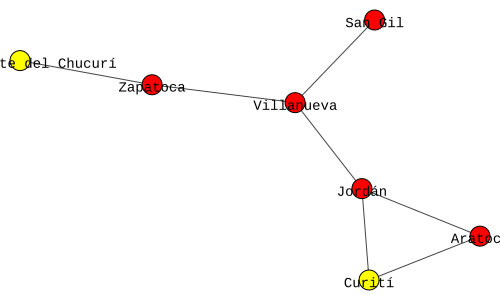

In [125]:
g.delete_vertices(4)
g.add_vertex(6,label="San Gil")
g.add_edge(3,6)
ig.plot(g,bbox=(0,0,500,300))

Ahora elimanos el arco (Aratoca, Curití)

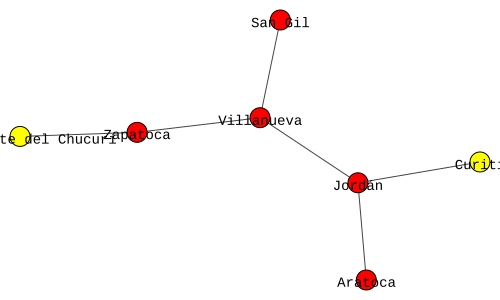

In [126]:
g.delete_edges((0,1))
ig.plot(g,bbox=(0,0,500,300))

## *NetworkX*

Comenzaremos eliminando el nodo "Barichara", para luego agregar el nuevo nodo y establecer el arco propuesto.

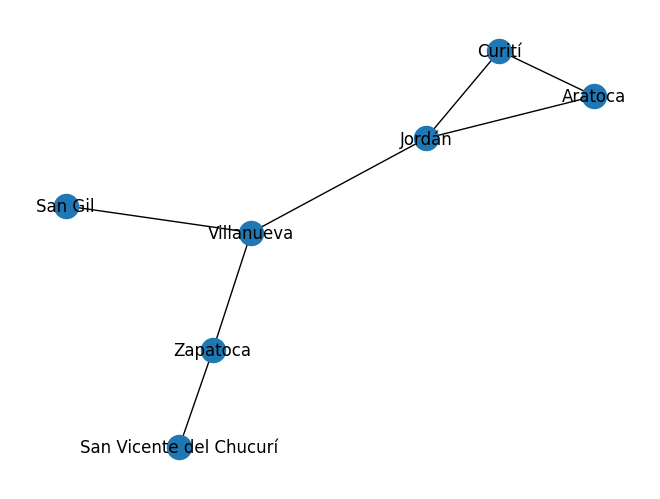

In [127]:
G.remove_node("Barichara")
G.add_node("San Gil")
G.add_edge("Villanueva","San Gil")
nx.draw(G, with_labels = True)

Ahora elimanos el arco (Aratoca, Curití)

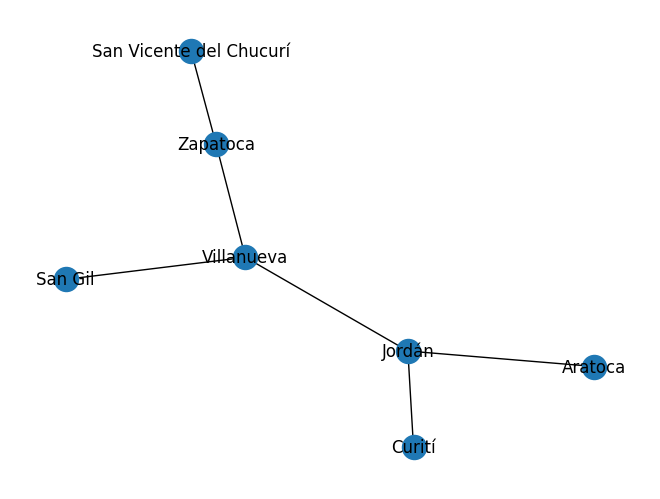

In [128]:
G.remove_edge("Aratoca","Curití")
nx.draw(G, with_labels = True)

---

## **Creación de subgrafos**

Ambas librerias nos dan la posibilidad de crear subgrafos a partir de grafos existentes. En este caso, crearemos un subgrafo a partir del grafo original conservando los nodos ("San Gil","Villanueva","Zapatoca","San Vicente del Chucurí").

## *IGraph*

A partir del método "subgraph" obtenemos una copia del grafo original, conservando solo los nodos deseados.



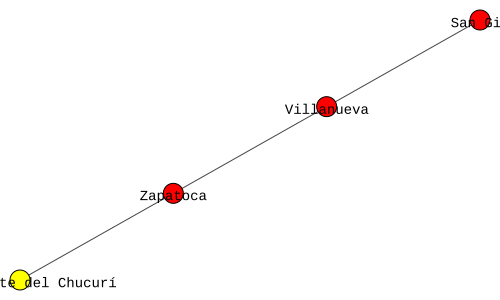

In [129]:
subgraph = g.subgraph([6,3,4,5])
ig.plot(subgraph,bbox=(0,0,500,300))

## *NetworkX*

De manera muy similar a IGraph, se usa el método "subgraph" para obtener un subgrafo.

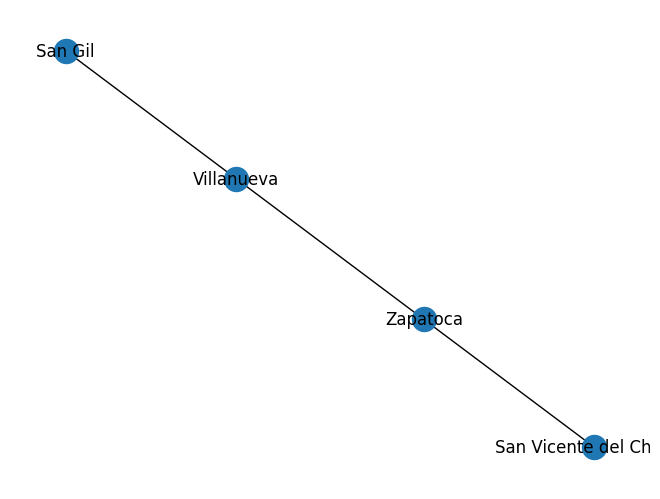

In [130]:
subgraph2=G.subgraph(["San Gil","Villanueva","Zapatoca","San Vicente del Chucurí"])
nx.draw(subgraph2, with_labels = True)

---

## **Vista de propiedades**

Mas que en simples contenedores de información, el interés en los grafos radica en las conexiones entre sus nodos. Ambas librerias ofrecen herramientas para consultar información de interés como el número de nodos y arcos, lista de nodos, arcos y nodos adyacentes, etc.

## *IGraph*

Para consultar el número de nodos y arcos se hace de la siguiente manera:




In [131]:
g.vcount(),g.ecount()

(7, 6)

Obtenemos la lista de los nodos

In [132]:
[x for x in g.vs]

[igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 0, {'label': 'Aratoca', 'color': 'red', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 1, {'label': 'Curití', 'color': 'yellow', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 2, {'label': 'Jordán', 'color': 'red', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 3, {'label': 'Villanueva', 'color': 'red', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 4, {'label': 'Zapatoca', 'color': 'red', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 5, {'label': 'San Vicente del Chucurí', 'color': 'yellow', 'name': None}),
 igraph.Vertex(<igraph.Graph object at 0x7e4534269640>, 6, {'label': 'San Gil', 'color': None, 'name': 6})]

Ahora la lista de los arcos

In [133]:
[x for x in g.es]

[igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 3, {}),
 igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 4, {}),
 igraph.Edge(<igraph.Graph object at 0x7e4534269640>, 5, {})]

También podemos obtener la lista de adyacencia para un nodo específico

In [143]:
nodo=6
mode="all"
incidents=g.incident(nodo,mode)
print(f"El nodo {nodo} con nombre {g.vs[nodo]['label']} tiene los siguientes arcos incidentes: {incidents}, y la siguiente lista de adyacencia {[g.vs[g.es[a].tuple[0]]['label'] for a in incidents]}")


El nodo 6 con nombre San Gil tiene los siguientes arcos incidentes: [5], y la siguiente lista de adyacencia ['Villanueva']


Y el grado de un nodo

In [144]:
nodo=3
g.degree(nodo)

3

## *NetworkX*

Obtenemos el número de nodos y arcos, respectivamente

In [146]:
G.number_of_nodes(), G.number_of_edges()

(7, 6)

Ahora la lista de nodos

In [147]:
list(G.nodes)

['Aratoca',
 'Curití',
 'Jordán',
 'Villanueva',
 'Zapatoca',
 'San Vicente del Chucurí',
 'San Gil']

Y la lista de arcos

In [148]:
list(G.edges)

[('Aratoca', 'Jordán'),
 ('Curití', 'Jordán'),
 ('Jordán', 'Villanueva'),
 ('Villanueva', 'Zapatoca'),
 ('Villanueva', 'San Gil'),
 ('Zapatoca', 'San Vicente del Chucurí')]

La lista de nodos adyecentes a un nodo determinado

In [149]:
node="Jordán"
list(G.adj[node])

['Aratoca', 'Curití', 'Villanueva']

Por último, el grado de un nodo

In [150]:
node="Jordán"
G.degree(node)

3

---

## **Operaciones añadidas**

IGraph y NetworkX son dos librerías que aparte de facilitar en gran medida operaciones básicas con grafos, ofrecen algunas utilidades adicionales.

## *IGraph*

Esta librería nos da la posibilidad de añadir diferentes atributos y metadatos a un nodo o arco.
Para ejemplificar esto vamos a añadir los atributos provincia y población.


In [157]:
g.vs["Provincia"]=["Guanentá","Guanentá","Guanentá","Guanentá","Metropolitana","Yariguíes","Guanentá"]
g.vs["Población"]=[8229,11899,1336,5858,10011,34640,63602]

[(x['label'],x['Provincia'],x['Población']) for x in g.vs]

[('Aratoca', 'Guanentá', 8229),
 ('Curití', 'Guanentá', 11899),
 ('Jordán', 'Guanentá', 1336),
 ('Villanueva', 'Guanentá', 5858),
 ('Zapatoca', 'Metropolitana', 10011),
 ('San Vicente del Chucurí', 'Yariguíes', 34640),
 ('San Gil', 'Guanentá', 63602)]

Además tenemos la opción de obtener una lista de nodos escogidos a partir de un filtro determinado. Para mostrar esto, vamos a encontrar el nodo con mayor población.

In [158]:
max_poblacion=max(g.vs['Población']) #Encontramos el valor máximo de población
g.vs.select(Población=max_poblacion)['label'] #Obtenemos el nombre del nodo con mayor población

['San Gil']

## *NetworkX*

De la misma manera que con IGraph, podemos asignar varios atributos a un nodo o arco. Vamos a añadir los mismos atributos que usamos en el apartado anterior con IGraph.

In [160]:
Provincias=["Guanentá","Guanentá","Guanentá","Guanentá","Metropolitana","Yariguíes","Guanentá"]
Poblaciones=[8229,11899,1336,5858,10011,34640,63602]
for name,provincia,poblacion in zip(G.nodes,Provincias,Poblaciones):  #iteramos sobre las 3 listas a la vez
  G.nodes[name]['Provincia']=provincia
  G.nodes[name]['Población']=poblacion
G.nodes.data()


NodeDataView({'Aratoca': {'Provincia': 'Guanentá', 'Población': 8229}, 'Curití': {'Provincia': 'Guanentá', 'Población': 11899}, 'Jordán': {'Provincia': 'Guanentá', 'Población': 1336}, 'Villanueva': {'Provincia': 'Guanentá', 'Población': 5858}, 'Zapatoca': {'Provincia': 'Metropolitana', 'Población': 10011}, 'San Vicente del Chucurí': {'Provincia': 'Yariguíes', 'Población': 34640}, 'San Gil': {'Provincia': 'Guanentá', 'Población': 63602}})

Otra utilidad que ofrece NetworkX es la opción de unir dos grafos. Vamos a unir el grafo que ya tenemos con otro que vamos a crear.

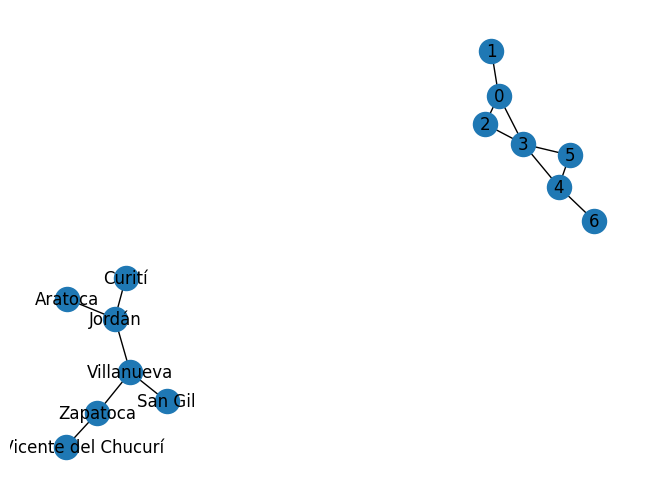

In [161]:
edgelist2=[(0,1),(0,2),(0,3),(2,3),(3,4),(3,5),(4,5),(4,6)]
H=nx.from_edgelist(edgelist2) #Creamos un nuevo grafo a partir de edgelist2

union_graph=nx.union(G,H)
nx.draw(union_graph, with_labels = True)